In [13]:
import sys
sys.path.insert(1, '../image_recuperation')
sys.path.insert(1, '../question_recuperation')
from question_utils import *
from image_utils import *
from PIL import Image

In [15]:
coco = COCO('../../COCO/dataset/instances_train2017.json')
dataset = 'dataset_2'
vocab=pd.read_pickle(f'../question_recuperation/embeddings/gte-small_question_embeddings_{dataset}.pickle')
questions = pd.DataFrame(vocab)
n_images_rec = 50

loading annotations into memory...
Done (t=11.87s)
creating index...
index created!


In [16]:
eval_images = [f for f in os.listdir(f'./evaluation_images') if not f.startswith('.')]

In [17]:
im = Image.open(f'./evaluation_images/{eval_images[0]}')

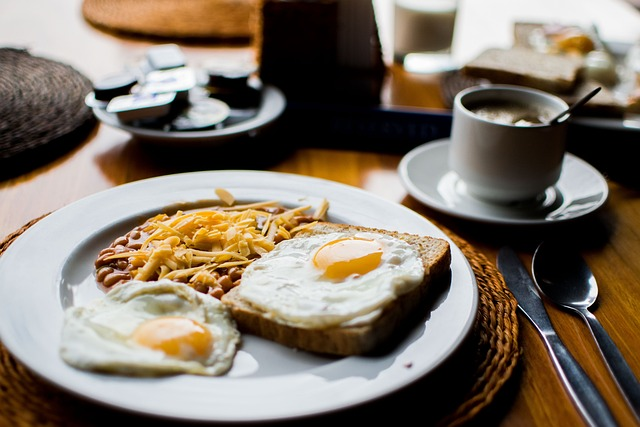

In [18]:
im

In [22]:
sim = calculate_similarity(im,'pixels', 'nrmse', coco, dataset)
top_sim = sim[:n_images_rec]
questions_filtered = questions[questions['image_id'].isin(top_sim['ids'])]
centroid = calcular_centroide(questions_filtered['vectors'])
distances = []
for v in questions_filtered['vectors']:
    distances.append(euclidean_distance(centroid, v))
questions_filtered['distances'] = distances
questions_filtered.sort_values(by = 'distances')[:10][['question','distances']]

/tmp/ipykernel_120618/2419467978.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  questions_filtered['distances'] = distances


,question,distances
210101,What is the animal in the image?,0.417295
23131,Is this indoors?,0.423013
157289,What is the person holding?,0.424779
219439,What has just been thrown in this photograph?,0.425658
157281,What is this person holding?,0.426882
396677,How many people are in the photo?,0.429652
2625,Is there more than one animal in the picture?,0.429944
2630,Is there a bear?,0.430418
305279,What animal is visible in this picture?,0.432020
317089,What other kind of animal is in the picture?,0.434837


In [23]:
sim = calculate_similarity(im,'pixels', 'nmi', coco, dataset)
top_sim = sim[:n_images_rec]
questions_filtered = questions[questions['image_id'].isin(top_sim['ids'])]
centroid = calcular_centroide(questions_filtered['vectors'])
distances = []
for v in questions_filtered['vectors']:
    distances.append(euclidean_distance(centroid, v))
questions_filtered['distances'] = distances
questions_filtered.sort_values(by = 'distances')[:10][['question','distances']]

/tmp/ipykernel_120618/1946993090.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  questions_filtered['distances'] = distances


,question,distances
352986,What is this photo of?,0.411076
291906,Are there any people in this picture?,0.412031
164506,Is the plane landing?,0.420967
358375,What is the plane doing?,0.422918
34902,Is it sunny?,0.424527
38752,What is in the background of this photo?,0.424599
257547,Is this indoors?,0.428182
164508,What kind of plane is this?,0.431253
59980,Is it cloudy?,0.433187
425989,What is this person holding?,0.433599
